In [2]:
import numpy as np
import player_information as pi
import analytics as an
import pandas as pd

In [25]:
team_A_df = pi.create_rand_team(5)
team_B_df = pi.create_rand_team(5)

pi.get_all_perms(team_A_df, team_B_df)

In [2]:
# Initialize database (get_all_perms), record initial avg coef
score_0 = []
score_end = []
coef_0 = []
coef_end = []
all_coefs = []
all_scores = []
ranks = []
error_count = 0

for i in range(0,1000):
    
    try:
        team_A_df = pi.create_rand_team(5)
        team_B_df = pi.create_rand_team(5)
        teamsA = team_A_df
        teamsB = team_B_df

        pi.get_all_perms(team_A_df, team_B_df)

        scores = np.zeros(5)
        coefs = np.zeros(5)
        # pick1

        con = pi.open_sql_con()

        team_A_df = an.load_team_a(con)
        team_B_df = an.load_team_b(con)

        stds = an.calc_stds_coef(con, team_A_df, team_B_df)
        #id_1a = team_A_df['a_id'].iloc[stds.index(min(stds))]
        #id_1a = team_A_df['a_id'].iloc[stds.index(max(stds))]
        id_1a = np.random.choice(team_A_df['a_id'].values)

        pj = an.agg_scores_init(con)
        cj = an.agg_coefs_init(con)
        scores[0] = pj['r1'].mean()
        coefs[0] = cj['r1'].mean()
        coef_perms0 = cj['r1']

        # line1, random choice

        (player_1a, player_1a_id) = an.get_prev_player(con, id_1a, 'team_a')

        poss = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_1a, player_1a_id, 0, poss)

        id_1b = np.random.choice(team_B_df['b_id'].values)

        # line2, random choice, calc new coef

        (player_1b, player_1b_id) = an.get_prev_player(con, id_1b, 'team_b')

        poss = [2, 3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_1b, player_1b_id, 1, poss)

        team_B_df = an.load_team(con, 'b')
        lineup = an.get_lineup(con)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[1] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[1] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms1 = cj[~cj['r2'].isna()]['r2']

        id_2b = np.random.choice(team_B_df['b_id'].values)

        # pick2

        (player_2b, player_2b_id) = an.get_prev_player(con, id_2b, 'team_b')

        poss = [2, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_2b, player_2b_id, 3, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')

        #team_A_df = an.calc_coefs(con, team_A_df, player_2b, player_2b_id)
        #team_A_df = an.calc_ind_coefs(con, team_A_df, player_2b, player_2b_id)
        #id_2a = team_A_df['a_id'].iloc[0]
        id_2a = an.similar_skills(con, player_2b_id)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)

        # pick3, calc new coef

        (player_2a, player_2a_id) = an.get_prev_player(con, id_2a, 'team_a')

        poss = [4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_2a, player_2a_id, 2, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')
        team_B_df = an.load_team(con, 'b')

        stds = an.calc_stds_coef(con, team_A_df, team_B_df)
        #id_3a = team_A_df['a_id'].iloc[stds.index(min(stds))]
        #id_3a = team_A_df['a_id'].iloc[stds.index(max(stds))]
        id_3a = np.random.choice(team_A_df['a_id'].values)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[2] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[2] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms2 = cj[~cj['r2'].isna()]['r2']

        # line3

        (player_3a, player_3a_id) = an.get_prev_player(con, id_3a, 'team_a')

        poss = [5, 6, 7, 8, 9]
        an.update_lineup(con, player_3a, player_3a_id, 4, poss)

        team_B_df = an.load_team(con, 'b')

        id_3b = np.random.choice(team_B_df['b_id'].values)

        # line4, calc new coef

        (player_3b, player_3b_id) = an.get_prev_player(con, id_3b, 'team_b')

        poss = [6, 7, 8, 9]
        an.update_lineup(con, player_3b, player_3b_id, 5, poss)

        team_B_df = an.load_team(con, 'b')

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[3] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[3] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms3 = cj[~cj['r2'].isna()]['r2']

        id_4b = np.random.choice(team_B_df['b_id'].values)

        # pick4

        (player_4b, player_4b_id) = an.get_prev_player(con, id_4b, 'team_b')

        poss = [6, 8, 9]
        an.update_lineup(con, player_4b, player_4b_id, 7, poss)

        team_A_df = an.load_team(con, 'a')

        #team_A_df = an.calc_coefs(con, team_A_df, player_4b, player_4b_id)
        #team_A_df = an.calc_ind_coefs(con, team_A_df, player_4b, player_4b_id)
        #id_4a = team_A_df['a_id'].iloc[0]
        id_4a = an.similar_skills(con, player_4b_id)
        

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)

        

        # pick5, calc new coef

        (player_4a, player_4a_id) = an.get_prev_player(con, id_4a, 'team_a')

        poss = [8, 9]
        an.update_lineup(con, player_4a, player_4a_id, 6, poss)

        team_A_df = an.load_team(con, 'a')
        team_B_df = an.load_team(con, 'b')

        stds = an.calc_stds_coef(con, team_A_df, team_B_df)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[4] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[4] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms4 = cj[~cj['r2'].isna()]['r2']

        rank = coef_perms0.rank(ascending=False)[coef_perms0==coefs[4]].iloc[0]

        # line5

        con.close()

        coef_0.append(coefs[0])
        coef_end.append(coefs[4])
        score_0.append(scores[0])
        score_end.append(scores[4])
        all_coefs.append(coefs)
        all_scores.append(scores)
        ranks.append(rank)
    except:
        con.close()
        error_count +=1

/home/codonnell/anaconda3/envs/insight/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/codonnell/anaconda3/envs/insight/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/codonnell/anaconda3/envs/insight/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Team b picks first

In [22]:
# Initialize database (get_all_perms), record initial avg coef
score_0 = []
score_end = []
coef_0 = []
coef_end = []
all_coefs = []
all_scores = []
ranks = []
error_count = 0

for i in range(0,1000):
    
    try:
        team_A_df = pi.create_rand_team(5)
        team_B_df = pi.create_rand_team(5)
        teamsA = team_A_df
        teamsB = team_B_df

        pi.get_all_perms(team_A_df, team_B_df)

        scores = np.zeros(5)
        coefs = np.zeros(5)
        
        # line1, random
        
        con = pi.open_sql_con()
        
        team_A_df = an.load_team_a(con)
        team_B_df = an.load_team_b(con)
        
        id_1b = np.random.choice(team_B_df['b_id'].values)
        
        pj = an.agg_scores_init(con)
        cj = an.agg_coefs_init(con)
        scores[0] = pj['r1'].mean()
        coefs[0] = cj['r1'].mean()
        coef_perms0 = cj['r1']
        
        # pick1, respond
        
        (player_1b, player_1b_id) = an.get_prev_player(con, id_1b, 'team_b')

        poss = [0, 2, 3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_1b, player_1b_id, 1, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')

        team_A_df = an.calc_coefs(con, team_A_df, player_1b, player_1b_id)
        #team_A_df = an.calc_ind_coefs(con, team_A_df, player_2b, player_2b_id)
        id_1a = team_A_df['a_id'].iloc[0]
        #id_2a = an.similar_skills(con, player_2b_id)
        
        # pick2, put up
        
        (player_1a, player_1a_id) = an.get_prev_player(con, id_1a, 'team_a')

        poss = [2, 3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_1a, player_1a_id, 0, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')
        team_B_df = an.load_team(con, 'b')

        stds = an.calc_stds_coef(con, team_A_df, team_B_df)
        id_2a = team_A_df['a_id'].iloc[stds.index(min(stds))]
        #id_3a = team_A_df['a_id'].iloc[stds.index(max(stds))]
        #id_3a = np.random.choice(team_A_df['a_id'].values)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[1] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[1] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms1 = cj[~cj['r2'].isna()]['r2']
        
        # line2, random
        
        (player_2a, player_2a_id) = an.get_prev_player(con, id_2a, 'team_a')

        poss = [3, 4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_2a, player_2a_id, 2, poss)

        team_B_df = an.load_team(con, 'b')

        id_2b = np.random.choice(team_B_df['b_id'].values)
        
        # line3, calc new
        
        (player_2b, player_2b_id) = an.get_prev_player(con, id_2b, 'team_b')

        poss = [4, 5, 6, 7, 8, 9]
        an.update_lineup(con, player_2b, player_2b_id, 3, poss)

        team_B_df = an.load_team(con, 'b')

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[2] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[2] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms2 = cj[~cj['r2'].isna()]['r2']

        id_3b = np.random.choice(team_B_df['b_id'].values)
        
        # pick3, respond
        
        (player_3b, player_3b_id) = an.get_prev_player(con, id_3b, 'team_b')

        poss = [4, 6, 7, 8, 9]
        an.update_lineup(con, player_3b, player_3b_id, 5, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')

        team_A_df = an.calc_coefs(con, team_A_df, player_3b, player_3b_id)
        #team_A_df = an.calc_ind_coefs(con, team_A_df, player_2b, player_2b_id)
        id_3a = team_A_df['a_id'].iloc[0]
        #id_2a = an.similar_skills(con, player_2b_id)
        
        # pick4, put up
        
        (player_3a, player_3a_id) = an.get_prev_player(con, id_3a, 'team_a')

        poss = [6, 7, 8, 9]
        an.update_lineup(con, player_3a, player_3a_id, 4, poss)

        lineup = an.get_lineup(con)
        team_A_df = an.load_team(con, 'a')
        team_B_df = an.load_team(con, 'b')

        stds = an.calc_stds_coef(con, team_A_df, team_B_df)
        id_4a = team_A_df['a_id'].iloc[stds.index(min(stds))]
        #id_3a = team_A_df['a_id'].iloc[stds.index(max(stds))]
        #id_3a = np.random.choice(team_A_df['a_id'].values)

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[3] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[3] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms3 = cj[~cj['r2'].isna()]['r2']
        
        # line4, random
        
        (player_4a, player_4a_id) = an.get_prev_player(con, id_4a, 'team_a')

        poss = [7, 8, 9]
        an.update_lineup(con, player_4a, player_4a_id, 6, poss)

        team_B_df = an.load_team(con, 'b')

        id_4b = np.random.choice(team_B_df['b_id'].values)

        # line5, calc new
        
        (player_4b, player_4b_id) = an.get_prev_player(con, id_4b, 'team_b')

        poss = [8, 9]
        an.update_lineup(con, player_4b, player_4b_id, 7, poss)

        team_B_df = an.load_team(con, 'b')

        pj = an.agg_scores(con)
        cj = an.agg_coefs(con)
        scores[4] = pj[~pj['r2'].isna()]['r2'].mean()
        coefs[4] = cj[~cj['r2'].isna()]['r2'].mean()
        coef_perms2 = cj[~cj['r2'].isna()]['r2']

        id_5b = np.random.choice(team_B_df['b_id'].values)

        rank = coef_perms0.rank(ascending=False)[coef_perms0==coefs[4]].iloc[0]

        # pick5

        con.close()

        coef_0.append(coefs[0])
        coef_end.append(coefs[4])
        score_0.append(scores[0])
        score_end.append(scores[4])
        all_coefs.append(coefs)
        all_scores.append(scores)
        ranks.append(rank)
    except:
        con.close()
        error_count +=1

In [23]:
ranks

[8.0,
 32.0,
 9.0,
 28.0,
 14.0,
 25.0,
 29.0,
 36.0,
 31.0,
 49.0,
 92.0,
 10.0,
 34.0,
 25.0,
 1.0,
 23.0,
 56.0,
 8.0,
 24.0,
 2.0,
 25.0,
 66.0,
 30.0,
 5.0,
 1.0,
 20.0,
 21.0,
 23.0,
 1.0,
 8.0,
 35.0,
 12.0,
 16.0,
 28.0,
 69.0,
 22.0,
 4.0,
 1.0,
 3.0,
 46.0,
 85.0,
 4.0,
 3.0,
 20.0,
 3.0,
 22.0,
 32.0,
 9.0,
 4.0,
 44.0,
 51.0,
 12.0,
 6.0,
 17.0,
 4.0,
 26.0,
 18.0,
 25.0,
 18.0,
 1.0,
 12.0,
 1.0,
 1.0,
 3.0,
 1.0,
 48.0,
 5.0,
 6.0,
 81.0,
 1.0,
 26.0,
 31.0,
 80.0,
 67.0,
 19.0,
 12.0,
 46.0,
 4.0,
 23.0,
 4.0,
 17.0,
 2.0,
 10.0,
 66.0,
 39.0,
 8.0,
 23.0,
 1.0,
 8.0,
 6.0,
 7.0,
 72.0,
 3.0,
 31.0,
 13.0,
 53.0,
 31.0,
 39.0,
 21.0,
 19.0,
 92.0,
 5.0,
 14.0,
 27.0,
 19.0,
 21.0,
 5.0,
 7.0,
 13.0,
 1.0,
 33.0,
 22.0,
 27.0,
 25.0,
 18.0,
 3.0,
 22.0,
 2.0,
 1.0,
 44.0,
 54.0,
 14.0,
 7.0,
 31.0,
 2.0,
 22.0,
 1.0,
 8.0,
 28.0,
 31.0,
 12.0,
 30.0,
 40.0,
 27.0,
 1.0,
 1.0,
 14.0,
 78.0,
 16.0,
 20.0,
 4.0,
 51.0,
 2.0,
 9.0,
 31.0,
 8.0,
 7.0,
 28.0,
 15.0,
 8.0,
 13.0

In [24]:
cols = ['round_' + str(i) for i in range(0,5)]
results_0b = pd.DataFrame(all_coefs, columns=cols)
results_0b['ranks'] = np.array(ranks)
for i in range(0,5):
    results_0b['score_' + str(i)] = np.array(all_scores)[:,i]

In [25]:
results_0b.to_csv('results_0b.csv')

In [26]:
error_count

18

In [5]:
results_0

,round_0,round_1,round_2,round_3,round_4,ranks,score_0,score_1,score_2,score_3,score_4
0,1.942251,1.493331,1.918742,1.885218,3.541547,18.0,17.6,15.00,10.000000,15.0,21.0
1,1.718146,2.212246,3.727259,4.254749,5.294862,1.0,0.4,2.75,19.666667,24.0,31.0
2,0.719959,0.998055,2.070486,2.320087,2.755230,3.0,7.8,7.75,14.000000,20.5,21.0
3,-1.347324,-1.160181,-0.593550,-0.421489,-0.194691,13.0,-8.0,-7.25,-3.000000,-9.0,-9.0
4,0.355322,0.348811,1.080846,0.647619,0.368169,56.0,4.4,0.75,7.333333,10.5,10.0
...,...,...,...,...,...,...,...,...,...,...,...
993,-0.069789,0.020404,1.420263,0.966938,1.211789,26.0,-3.2,-1.75,1.666667,2.0,2.0
994,-0.811594,-0.995885,-0.647522,-0.241412,0.303051,14.0,1.0,-1.25,5.666667,14.0,19.0
995,5.243476,5.332574,7.744898,6.720695,8.886581,12.0,19.6,21.25,25.000000,21.5,22.0
996,-0.793779,-0.623988,0.280894,0.580685,0.912190,5.0,-4.0,0.25,4.000000,10.5,11.0


In [27]:
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.style as style
sb.set_context("poster", font_scale = 1)
style.use('seaborn-whitegrid')

In [4]:
print(np.mean(coef_0))
print(np.mean(coef_end))
print(np.mean(score_0))
print(np.mean(score_end))

0.12652076133186368
1.3109381147219659
-0.34824473420260776
6.286860581745236


In [50]:
print(np.mean(coef_0))
print(np.mean(coef_end))
print(np.mean(score_0))
print(np.mean(score_end))

0.2803242000441351
1.8204069850214
0.3726
8.355


In [29]:
def one_sided_p(coef_0, coef_end):
    '''Return the one-sided p value for a repeated measures t-test.'''

    (t, p) = stats.ttest_rel(coef_0,coef_end)
    #(t, p) = stats.ttest_ind(coef_0,coef_end)
    return p / 2
    

def cohend(d1, d2):
    '''Calculate Cohen's d, given by (u_d - u_0)/s_d,
    where u_d is the mean of the differences,
    s_d is the standard deviation of the differences,
    and u_0 = 0 for a null hypothesis of zero effect.'''
    
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

def plot_results(score_0, score_end, coef_0, coef_end):

    fig, ax = plt.subplots(1,2,figsize=(20,8), dpi=300, constrained_layout=True)

    g1a = sb.kdeplot(score_0, clip_on=False, shade=True, alpha=0.5, 
                    lw=1.5, bw=0.2, color = 'darkred', ax=ax[0])
    g1b = sb.kdeplot(score_end, clip_on=False, shade=True, alpha=0.5, 
                   lw=1.5, bw=0.2, color='blue', ax=ax[0])
    g1a.set_xlabel('Points margin', fontsize=24)
    g1a.set_ylabel('Density of occurences')
    g1a.legend(['Random choices','Using app recommendations'],frameon=True, framealpha=0.5, loc = 'upper left')

    g2a = sb.kdeplot(coef_0, clip_on=False, shade=True, alpha=0.5, 
                    lw=1.5, bw=0.2, color = 'darkred', ax=ax[1])
    g2b = sb.kdeplot(coef_end, clip_on=False, shade=True, alpha=0.5, 
                   lw=1.5, bw=0.2, color='blue', ax=ax[1])
    g2a.set_xlabel('Total score coefficient', fontsize=24)
    g2a.set_ylabel('Density of occurences')
    g2a.text(0.6,0.9,"Cohen's d:    {:.2G}\np-value:    {:.2G}".format(cohend(coef_end,coef_0), one_sided_p(coef_0,coef_end)),
             transform = ax[1].transAxes, bbox = dict(facecolor='white', edgecolor='lightgray', alpha=0.5))
    plt.show()

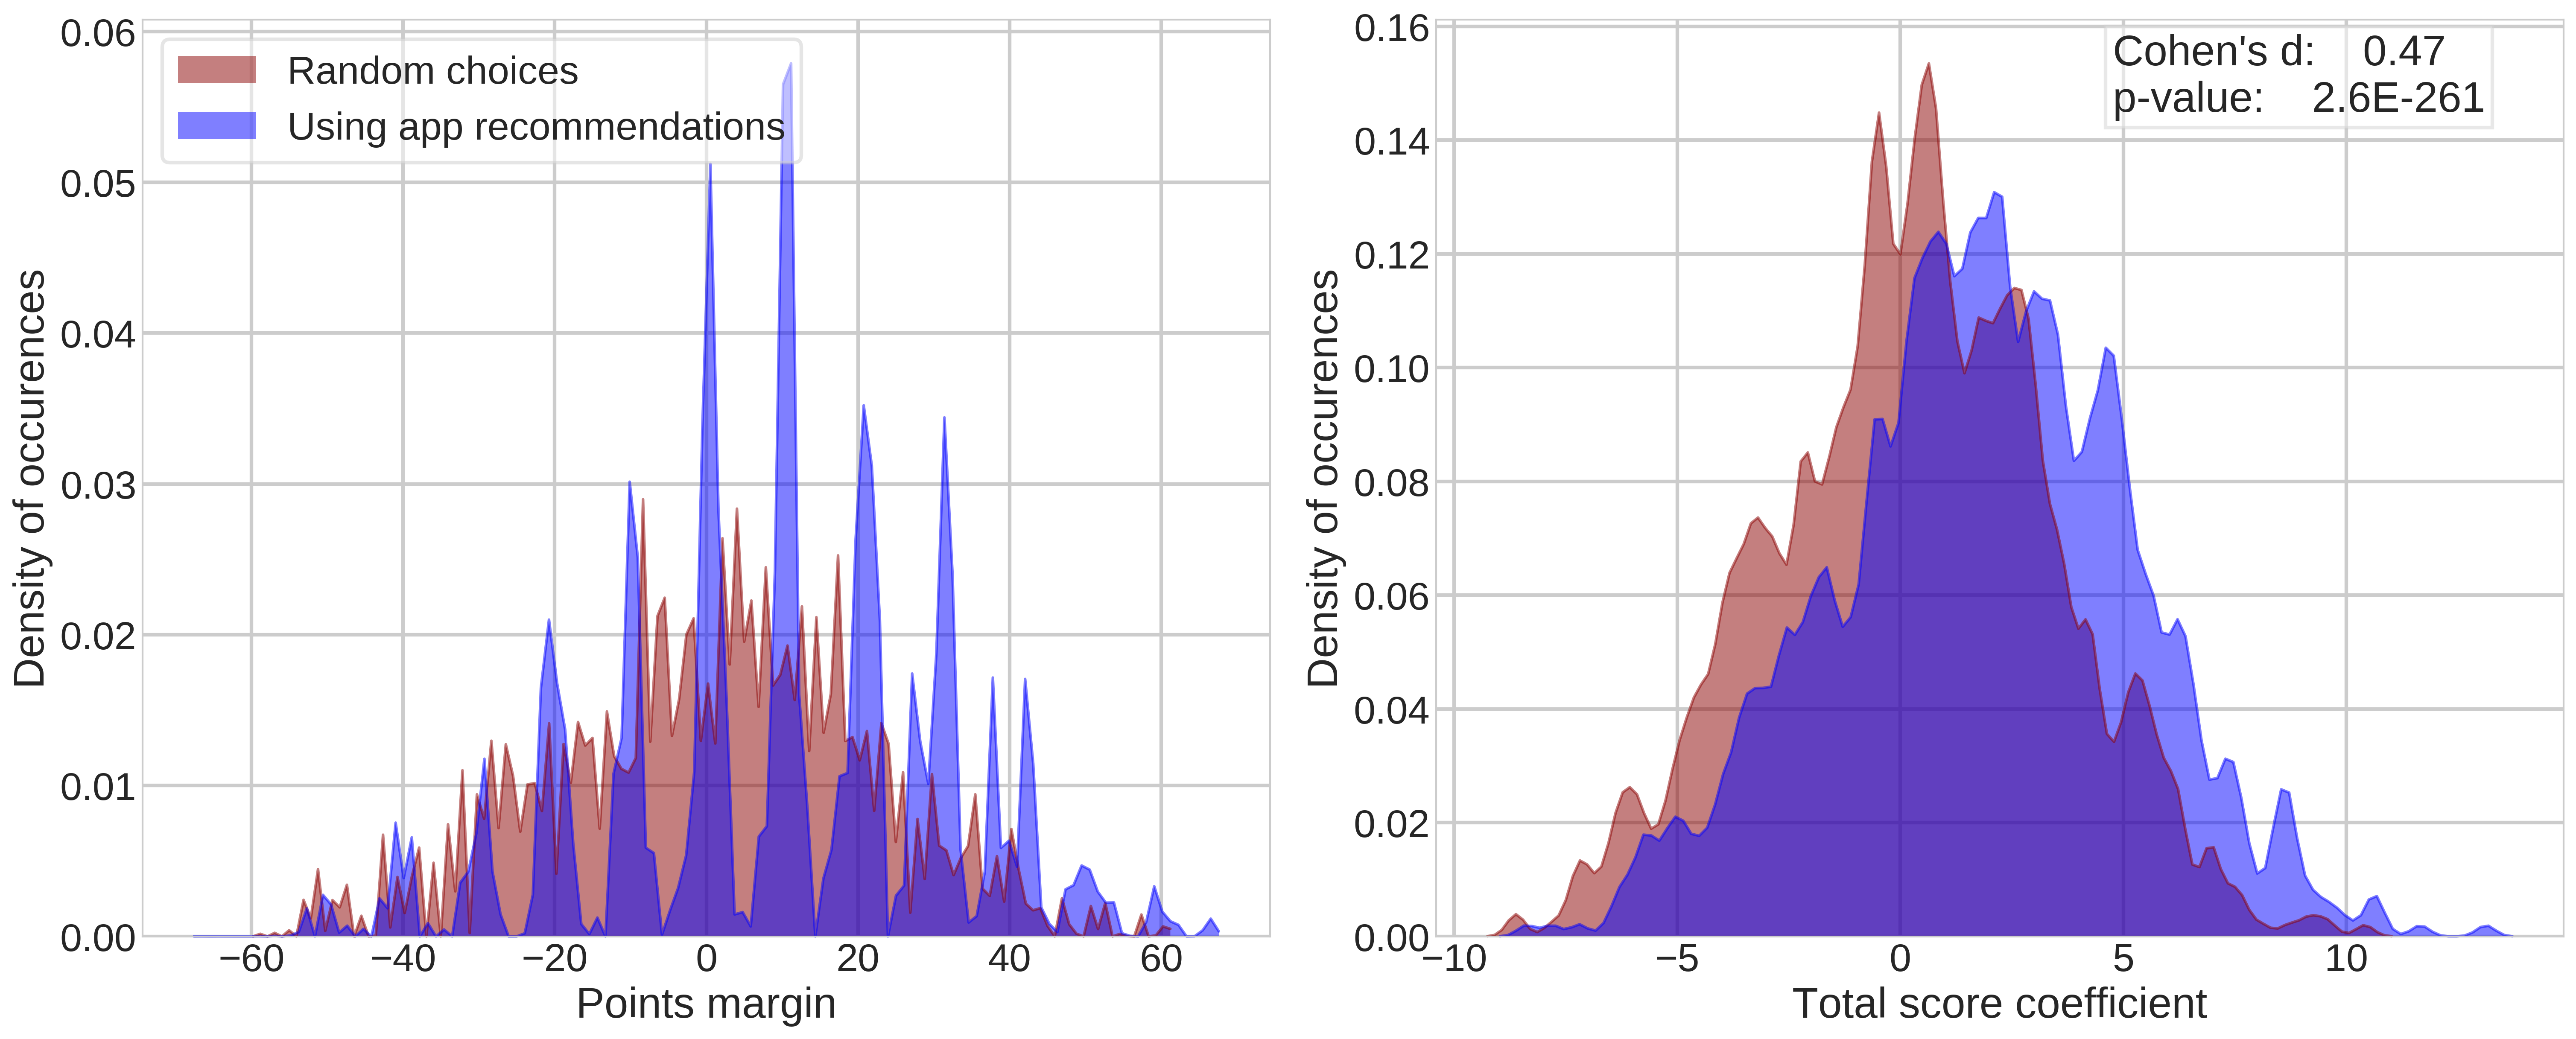

In [18]:
plot_results(score_0, score_end, coef_0, coef_end)

In [28]:
from scipy import stats

In [15]:
coef_0 = np.array(coef_0)
coef_end = np.array(coef_end)
score_0 = np.array(score_0)
score_end = np.array(score_end)

In [61]:
len(coef_0[coef_0>0])/len(coef_0) * 100

52.6

In [63]:
print('Percentage winning outcomes with random choices: {} %'.format(len(score_0[score_0>0])/len(score_0) * 100))
print('Percentage winning outcomes using app: {} %'.format(len(score_end[score_end>0])/len(score_end) * 100))

Percentage winning outcomes with random choices: 51.1 %
Percentage winning outcomes using app: 64.4 %


In [16]:
diff = coef_end - coef_0

In [37]:
mean_d = np.mean(diff)
s_d = np.std(diff)
s_0 = np.std(coef_0)
s_end = np.std(coef_end)
s_md = np.sqrt(np.square(s_d)/len(diff))

print(s_0)
print(s_end)

3.125435279420574
3.341136886894902


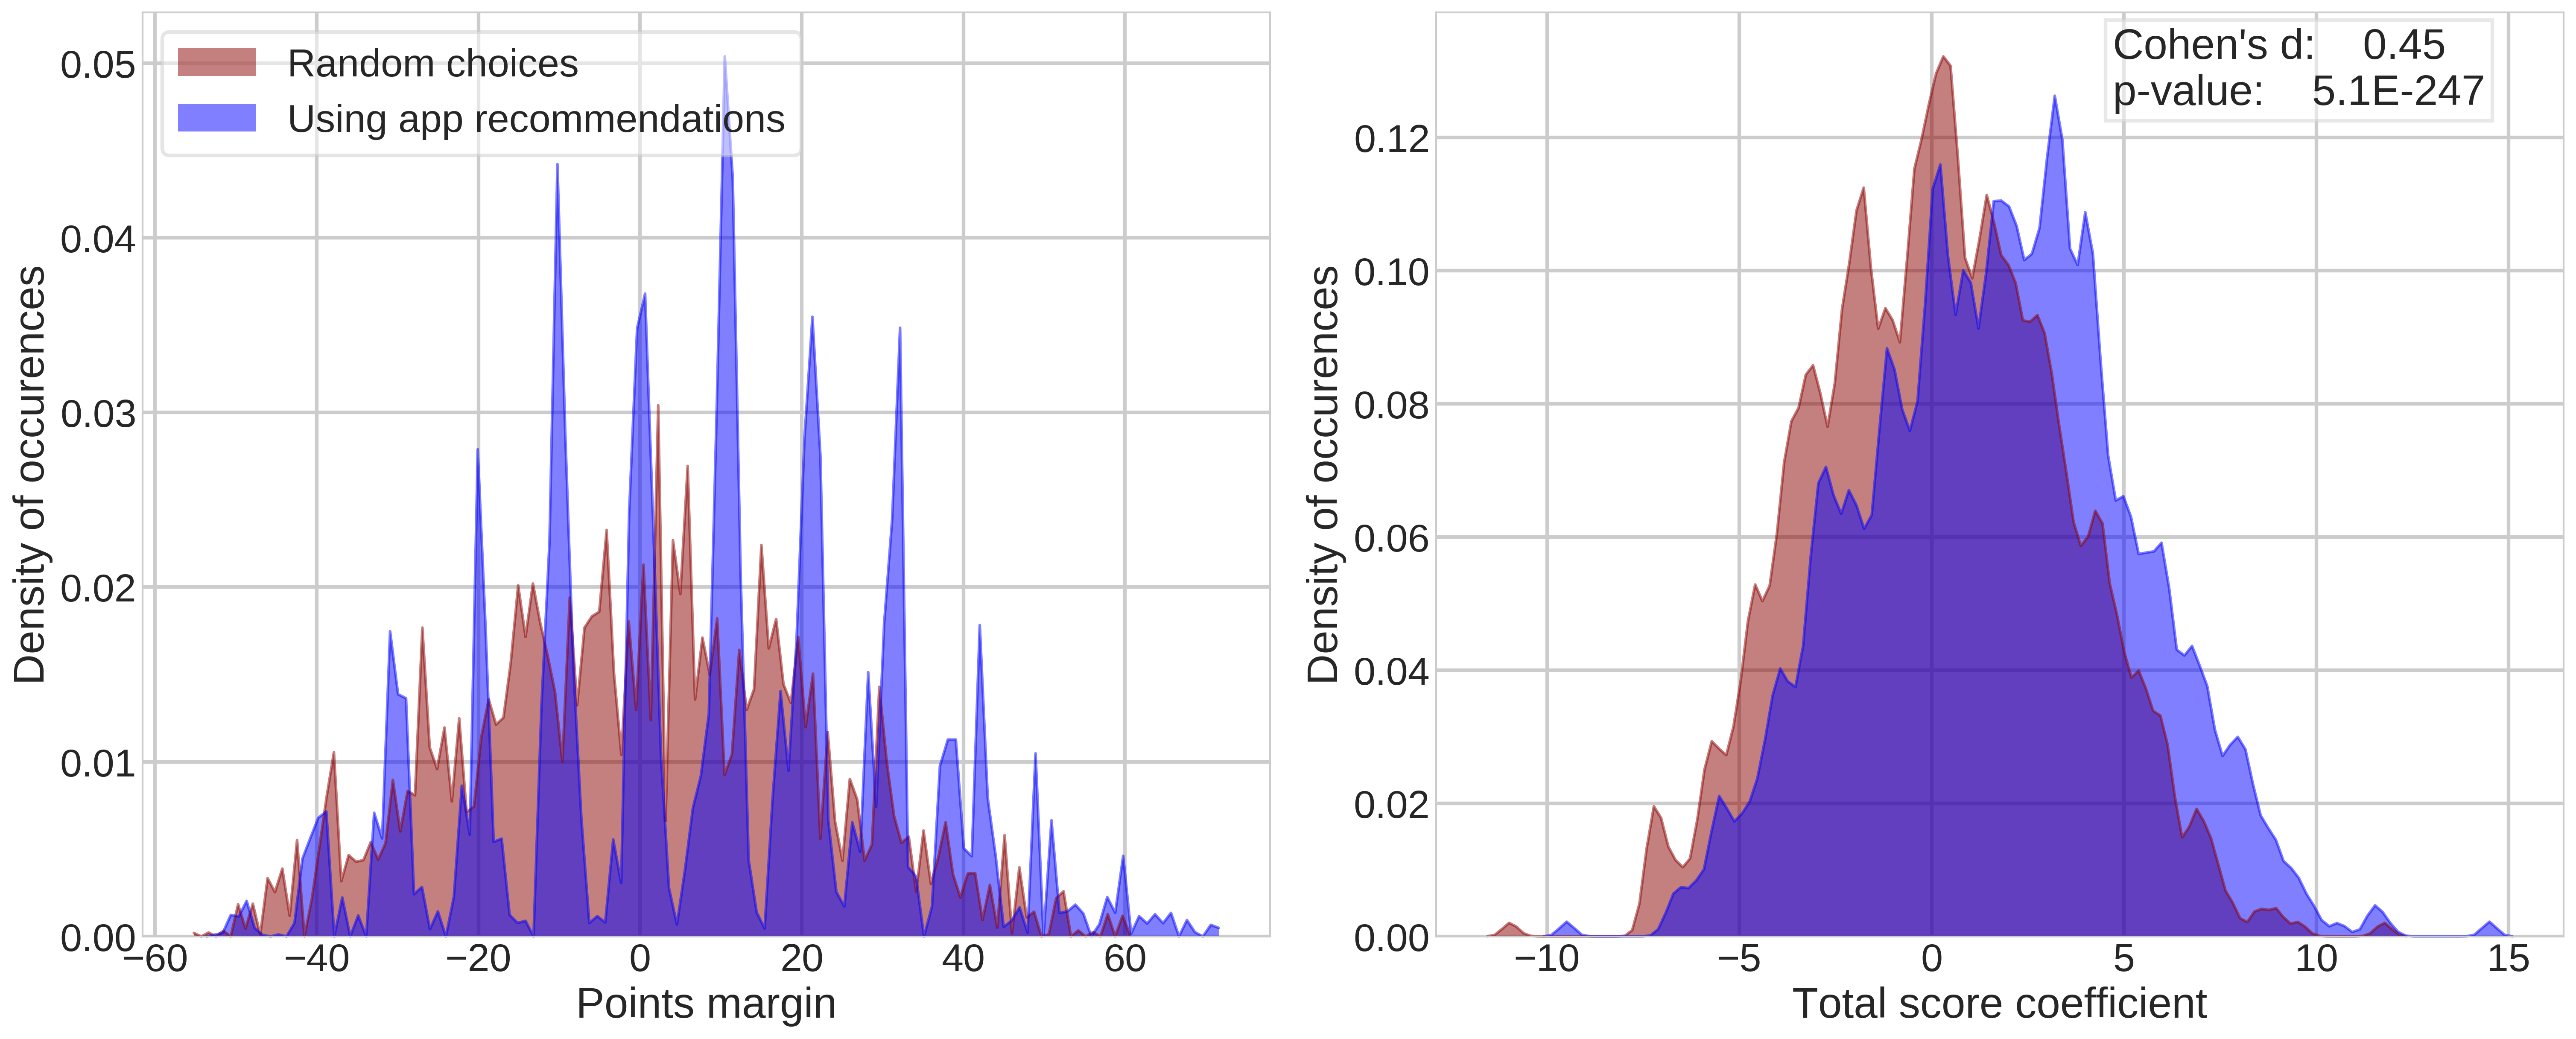

In [30]:
results_0b = pd.read_csv('results_0b.csv',index_col=0)

coef_b0 = results_0b['round_0'].values
coef_b4 = results_0b['round_4'].values
score_b0 = results_0b['score_0'].values
score_b4 = results_0b['score_4'].values

plot_results(score_b0, score_b4, coef_b0, coef_b4)

In [105]:
print(cohend(coef_00[0:997],coef_0))
print(stats.ttest_ind(coef_00[0:997],coef_0))

0.05670489319691228
Ttest_indResult(statistic=1.2660565899152787, pvalue=0.20564086233839432)


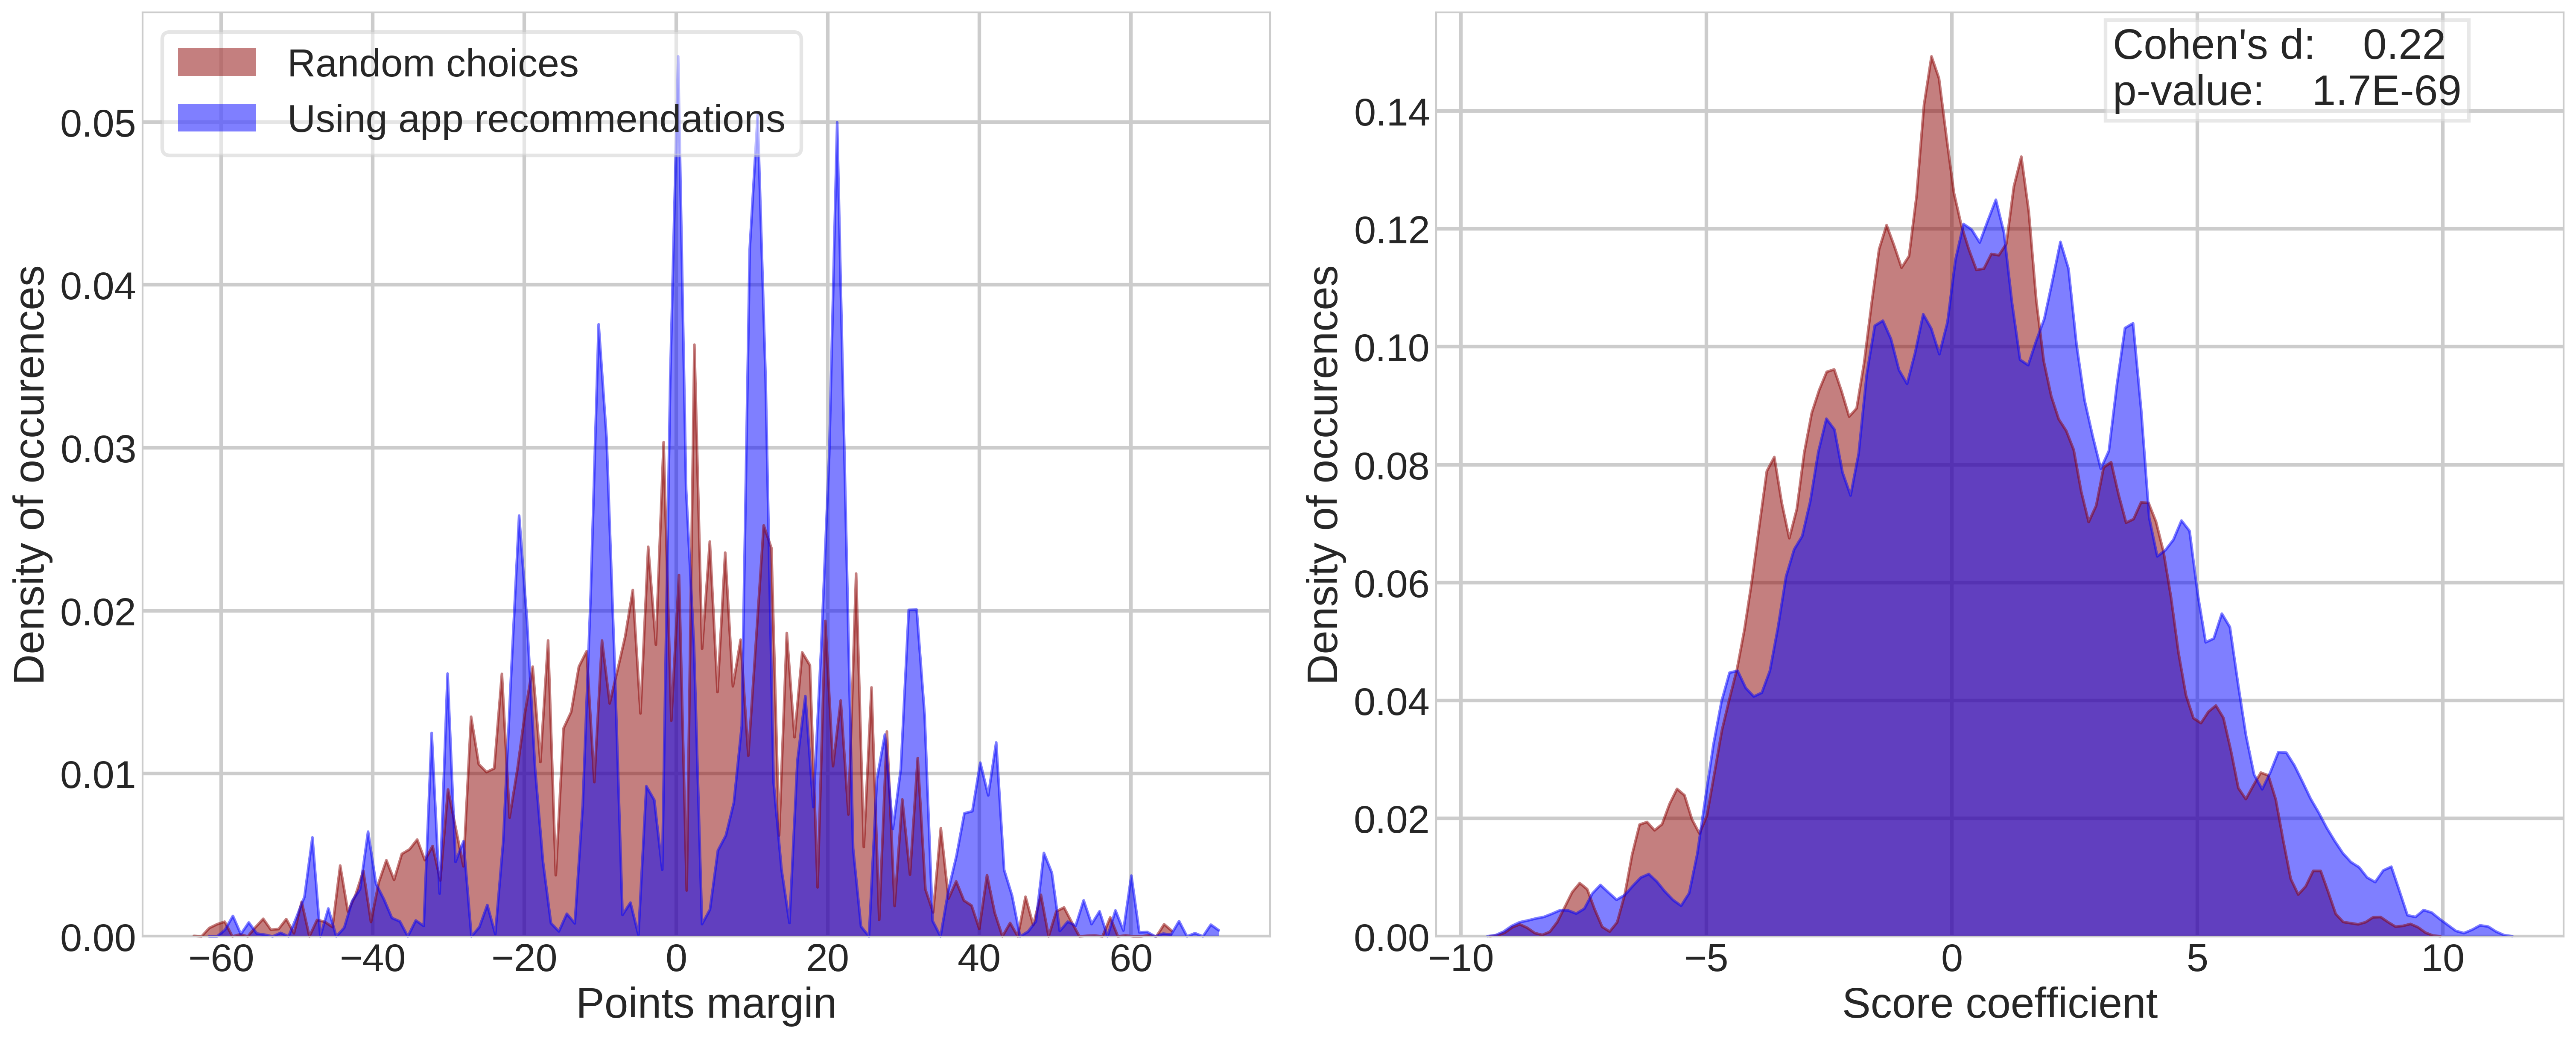

In [110]:
results_3 = pd.read_csv('results_3.csv',index_col=0)

coef_30 = results_2['round_0'].values
coef_34 = results_2['round_4'].values

plot_results(score_0, score_end, coef_30, coef_34)